In [30]:
import numpy as np
import math
import matplotlib
from matplotlib import pyplot

Importing

Creating a mesh grid.

In [31]:

N = 50                                # number of points in each direction
x_start, x_end = -2, 2            # boundaries in the x-direction
y_start, y_end = -1, 1        # boundaries in the y-direction
x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

X, Y = np.meshgrid(x, y)

Plotting the grid points

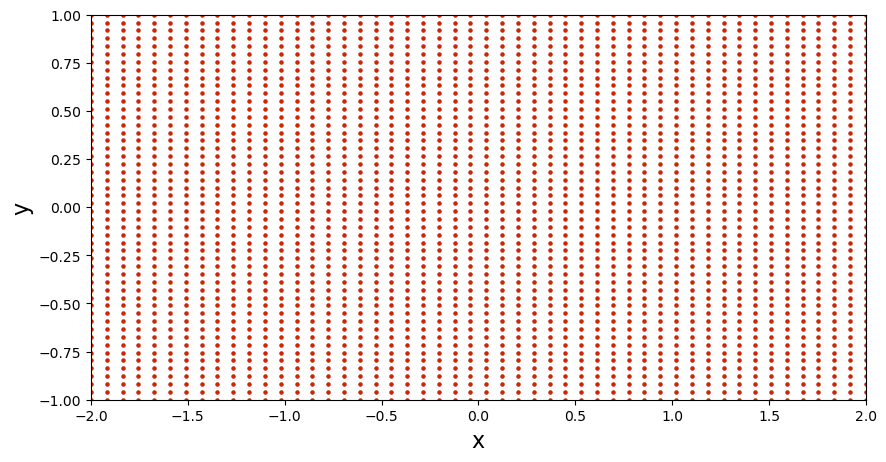

In [32]:

%matplotlib inline
# plot the grid of points
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=5, color='#CD2505', marker='o')

# Defining functions to calculate the stream function and the velocity components
 Could be re-used if we decide to insert more than one doublet in our domain.

In [33]:
def get_velocity_doublet(strength, xd, yd, X, Y):

    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)

    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)

    return psi

Once the functions have been defined, we call them using the parameters of the doublet: its strength `kappa` and its location
`x_doublet`, `y_doublet`.
while kappa is float equal to the strength of the double, we can let it be 1.0
`x_doublet`, `y_doublet` is the origin of the doublet.

In [34]:
pp = math.pi
kappa = 5 * math.pi                     # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0

In [35]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

# plot the streamlines of vortex

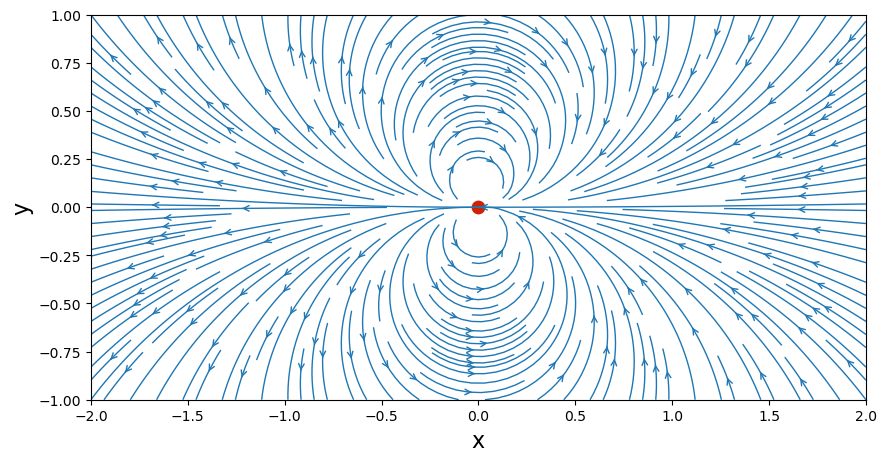

In [36]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

# Uniform velocity

In [37]:
u_inf = 10
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

# Superposition

In [38]:
u_tot = u_doublet + u_freestream
v_tot = v_doublet + v_freestream

psi_tot = psi_doublet + psi_freestream

Plotting

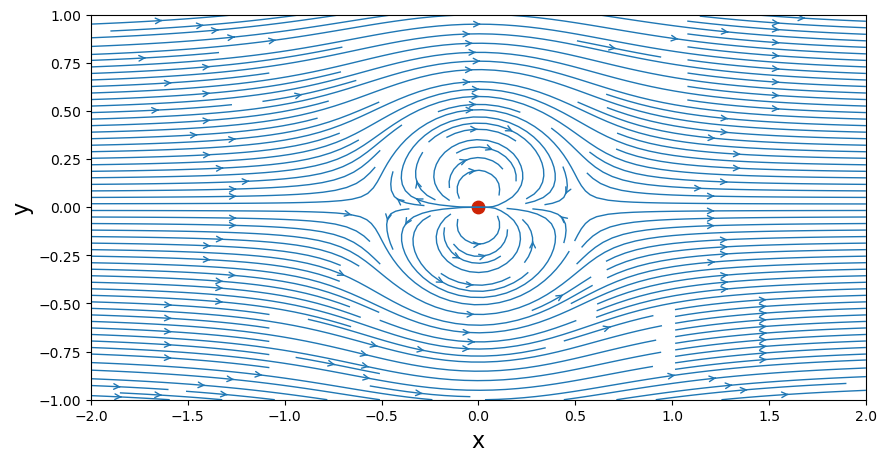

In [39]:
# plot the streamlines
width = 10
height = ( y_end - y_start) / (  x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-2, 2)
pyplot.ylim(-1, 1)
pyplot.streamplot(X, Y, u_tot, v_tot,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
#pyplot.contour(X, Y, psi_tot,
              # levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
#pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
  #             color='g', s=80, marker='o');

# Vortex

# Defining functions to calculate the stream function and the velocity components


In [40]:
def get_velocity_vortex (circulation, xc, yc , X, Y):

    u =((circulation/(2*math.pi))*(Y - yc))/((X - xc)**2 + (Y - yc)**2)

    v = -((circulation/(2*math.pi))*(X - xc))/((X - xc)**2 + (Y - yc)**2)

    return u , v


def get_stream_function_vortex(circulation, xc, yc , X, Y):
    psi = (-circulation  * math.log((X-xc)**2 + (Y-yc)**2 )) / (4 * math.pi)

    return psi

Vortex Velocity & stream function

In [41]:
circulation = -19.5

u_vortex , v_vortex  = get_velocity_vortex(circulation,0,0,X,Y)
psi_vortex = get_velocity_vortex(circulation,0,0,X,Y)


# Superposition

In [42]:
u = u_vortex + u_doublet + u_freestream
v = v_vortex + v_freestream + v_doublet
psi  = psi_tot + psi_vortex

# PLOTTING

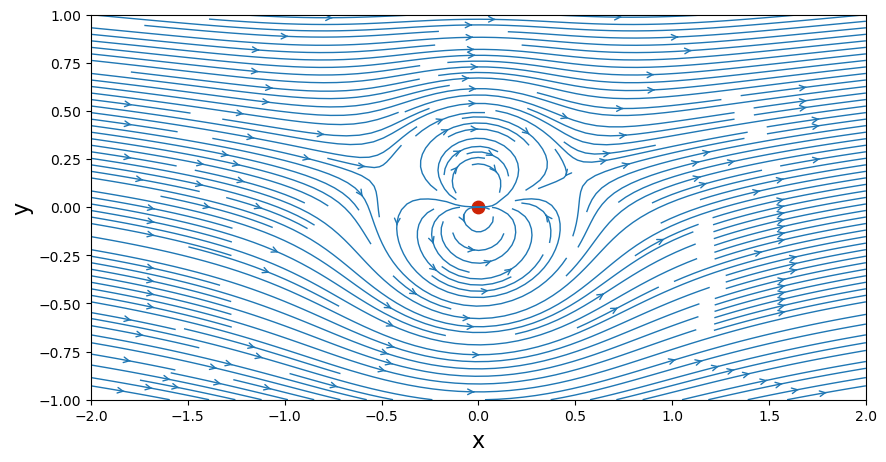

In [43]:

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# pressure coefficient - Cp

calculating pressure coefficient

In [44]:
cp1 = 1 - ((u_tot**2 + v_tot**2)/(u_inf**2))
cp2 = 1 - ((u**2 + v**2)/(u_inf**2))

# PLOTTING pressure coefficient Cp

TypeError: Input z must be 2D, not 3D

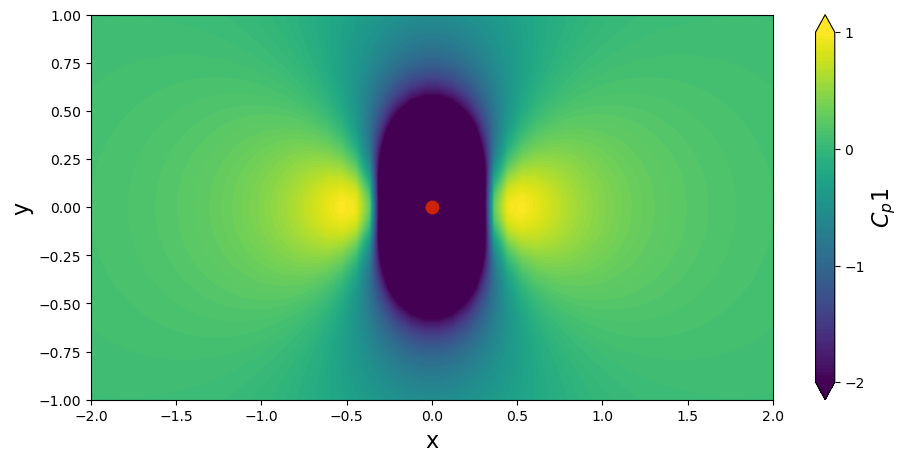

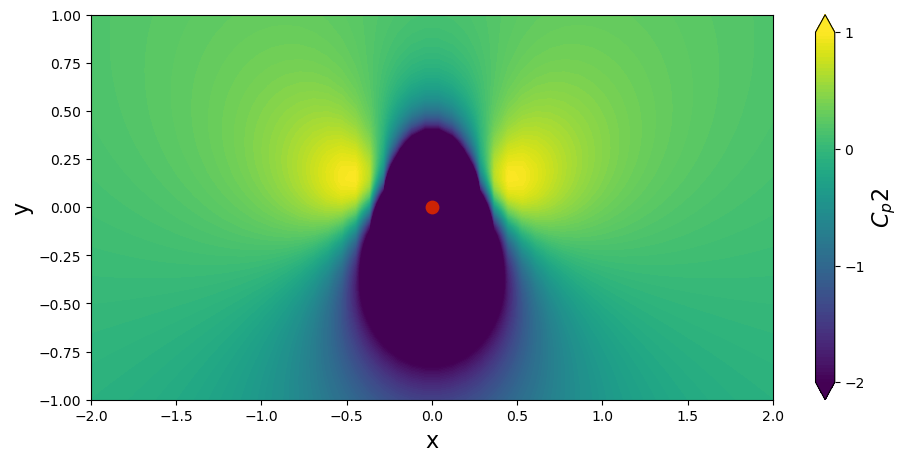

In [45]:
# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp1,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p1$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet,
               color='#CD2305', s=80, marker='o')
#pyplot.contour(X,Y,psi_tot,
 #              levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
#pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               #color='g', s=80, marker='o')

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp2,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p2$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
#pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               #color='g', s=80, marker='o');


In [ ]:
x_doublet1 , y_doublet1  = 0 , 1
x_doublet2 , y_doublet2  = 0 , -1

x_vortex1 , y_vortex1 = 0 , 1
x_vortex2 , y_vortex2 = 0 , -1

In [ ]:
u_doublet1, v_doublet1 = get_velocity_doublet(kappa, x_doublet1, y_doublet1, X, Y)
u_doublet2, v_doublet2 = get_velocity_doublet(kappa, x_doublet2, y_doublet2, X, Y)
# compute the stream-function on the mesh grid
psi_doublet1 = get_stream_function_doublet(kappa, x_doublet1, y_doublet1, X, Y)
psi_doublet2 = get_stream_function_doublet(kappa, x_doublet2, y_doublet2, X, Y)

In [ ]:
u_vortex1 , v_vortex1  = get_velocity_vortex(circulation,x_vortex1 , y_vortex1,X,Y)
u_vortex2 , v_vortex2  = get_velocity_vortex(-circulation,x_vortex2 , y_vortex2,X,Y)


psi_vortex1 = get_velocity_vortex(circulation,x_vortex1 , y_vortex1,X,Y)
psi_vortex2 = get_velocity_vortex(-circulation,x_vortex2 , y_vortex2,X,Y)


In [ ]:
u_tot1 = u_doublet1 + u_doublet2 + u_vortex1 + u_vortex2 + u_freestream
v_tot1 = v_doublet1 + v_doublet2 + v_vortex1 + v_vortex2 + v_freestream

psi_tot1 = psi_doublet1 + psi_doublet2 + psi_freestream + psi_vortex2 + psi_vortex1

TypeError: Input z must be 2D, not 3D

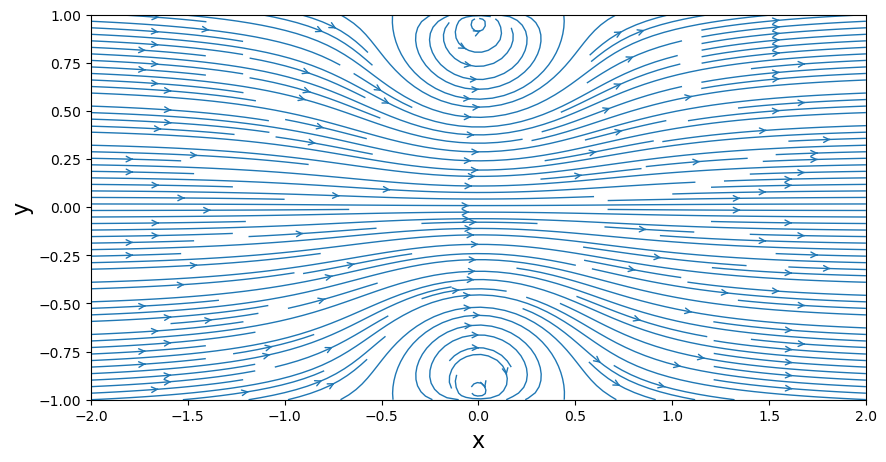

In [46]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_tot1, v_tot1,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi_tot1,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet1, y_doublet1, color='#CD2305', s=80, marker='o')
pyplot.scatter(x_doublet2, y_doublet2, color='#CD2305', s=80, marker='o')

In [55]:
cp3 = 1 - ((u_tot1**2 + v_tot1**2)/(u_inf**2))

TypeError: Input z must be 2D, not 3D

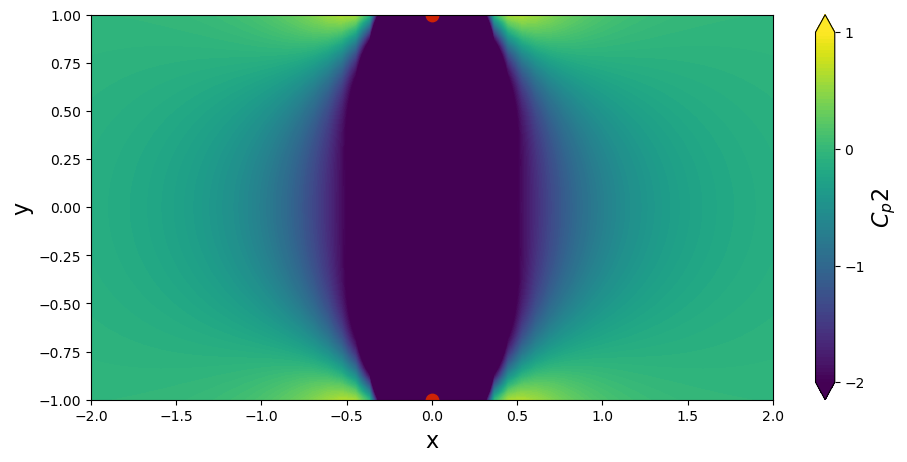

In [56]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp3,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p2$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet1, y_doublet1,
               color='#CD2305', s=80, marker='o')
pyplot.scatter(x_doublet2, y_doublet2,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi_tot1,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')

# Targil 3

In [47]:
x_vortex11 , y_vortex11 = 0 , 0.5
x_vortex22 , y_vortex22 = 0 , -0.5

In [48]:
u_inf1 = 10
u_freestream = u_inf1 * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)
psi_freestream11 = u_inf1 * Y


In [49]:
circulation11 = 19.5
circulation22 = -19.5

u_vortex11 , v_vortex11  = get_velocity_vortex(circulation11,x_vortex11 , y_vortex11,X,Y)
u_vortex22 , v_vortex22  = get_velocity_vortex(circulation22,x_vortex22 , y_vortex22,X,Y)

psi_vortex11 = get_velocity_vortex(circulation,x_vortex11 , y_vortex11,X,Y)
psi_vortex22 = get_velocity_vortex(circulation,x_vortex22 , y_vortex22,X,Y)

u3 = u_vortex11 + u_vortex22 + u_inf1
v3 = v_vortex22 + v_vortex11

In [50]:
psi3 = psi_vortex11 + psi_vortex22 +psi_freestream11

TypeError: Input z must be 2D, not 3D

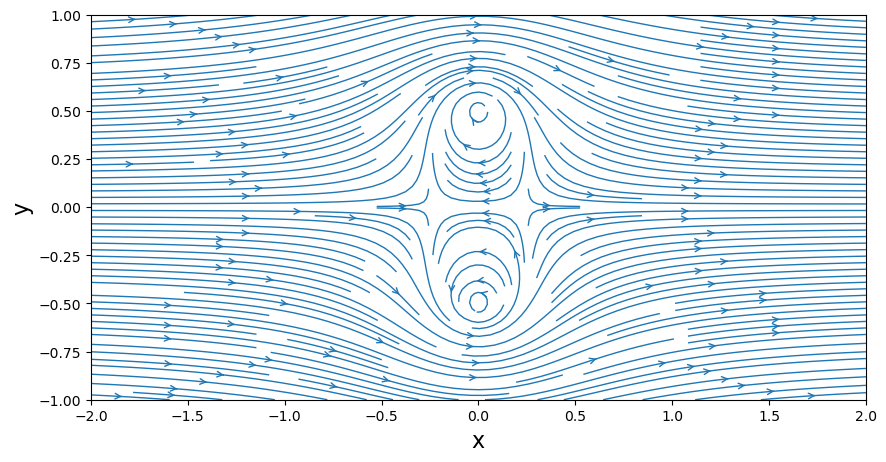

In [51]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u3, v3,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi3,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet11, y_doublet22, color='#CD2305', s=80, marker='o')

In [53]:
cp33 = 1 - ((u3**2 + v3**2)/(u_inf**2))

NameError: name 'x_doublet11' is not defined

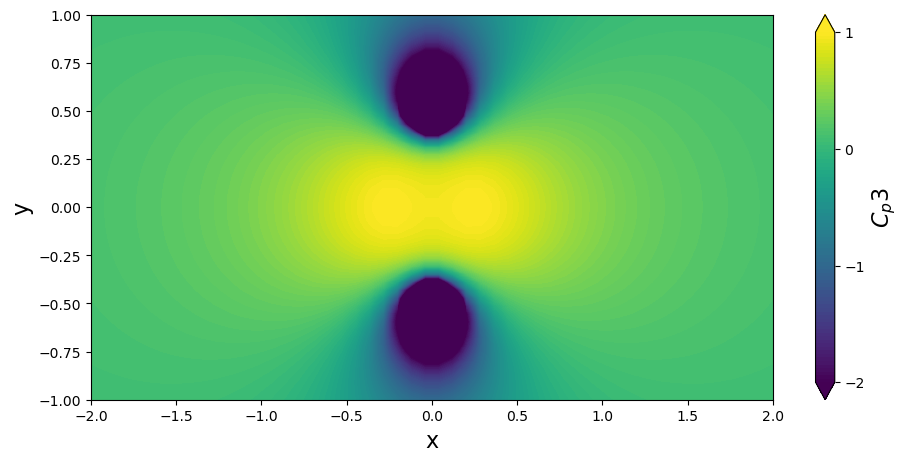

In [54]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp33,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p3$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet11, y_doublet11,
               color='#CD2305', s=80, marker='o')
pyplot.scatter(x_doublet22, y_doublet22,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi_tot1,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')